In [2]:
import baostock as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)

#### 获取历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节
rs = bs.query_history_k_data_plus("sh.688001",
      "date,code,open,high,low,close,preclose,volume,amount,pctChg",
      start_date='2019-07-22', end_date='2021-12-31',
      frequency="d", adjustflag="3")  # frequency="d"取日k线，adjustflag="3"默认不复权
print('query_history_k_data_plus respond error_code:' + rs.error_code)
print('query_history_k_data_plus respond  error_msg:' + rs.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [4]:
#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

In [5]:
result['date'] = result['date'].astype('string')
result['code'] = result['code'].astype('string')
for each in ['open', 'high', 'low', 'close', 'preclose', 'volume', 'amount', 'pctChg']:
    result[each] = result[each].asbtype("float")
print(result.head(5))

         date       code   open   high    low  close  preclose      volume  \
0  2019-07-22  sh.688001  55.40  72.02  39.59  55.50     24.26  29010754.0   
1  2019-07-23  sh.688001  46.92  52.65  45.01  48.73     55.50  10060618.0   
2  2019-07-24  sh.688001  48.90  52.18  48.90  51.52     48.73   9698629.0   
3  2019-07-25  sh.688001  52.78  57.42  52.70  54.71     51.52  13056123.0   
4  2019-07-26  sh.688001  54.00  54.00  50.01  50.66     54.71   8174241.0   

         amount      pctChg  
0  1.507398e+09  128.771600  
1  4.959887e+08  -12.198200  
2  4.921161e+08    5.725428  
3  7.189978e+08    6.191767  
4  4.233532e+08   -7.402700  


In [10]:
# https://blog.csdn.net/sinat_26811377/article/details/103211489, 将string类型的date转化为datetime
result['datetime'] = pd.to_datetime(result['date'])
result.head(5)

,date,code,open,high,low,close,preclose,volume,amount,pctChg,datetime
0,2019-07-22,sh.688001,55.40,72.02,39.59,55.50,24.26,29010754.0,1.507398e+09,128.771600,2019-07-22
1,2019-07-23,sh.688001,46.92,52.65,45.01,48.73,55.50,10060618.0,4.959887e+08,-12.198200,2019-07-23
2,2019-07-24,sh.688001,48.90,52.18,48.90,51.52,48.73,9698629.0,4.921161e+08,5.725428,2019-07-24
3,2019-07-25,sh.688001,52.78,57.42,52.70,54.71,51.52,13056123.0,7.189978e+08,6.191767,2019-07-25
4,2019-07-26,sh.688001,54.00,54.00,50.01,50.66,54.71,8174241.0,4.233532e+08,-7.402700,2019-07-26


In [12]:
# https://www.jianshu.com/p/cd8328341363 获取周几
result['day_of_week'] = result['datetime'].dt.dayofweek+1
result.head(10)

,date,code,open,high,low,close,preclose,volume,amount,pctChg,datetime,day_of_week
0,2019-07-22,sh.688001,55.40,72.02,39.59,55.50,24.26,29010754.0,1.507398e+09,128.771600,2019-07-22,1
1,2019-07-23,sh.688001,46.92,52.65,45.01,48.73,55.50,10060618.0,4.959887e+08,-12.198200,2019-07-23,2
2,2019-07-24,sh.688001,48.90,52.18,48.90,51.52,48.73,9698629.0,4.921161e+08,5.725428,2019-07-24,3
3,2019-07-25,sh.688001,52.78,57.42,52.70,54.71,51.52,13056123.0,7.189978e+08,6.191767,2019-07-25,4
4,2019-07-26,sh.688001,54.00,54.00,50.01,50.66,54.71,8174241.0,4.233532e+08,-7.402700,2019-07-26,5
5,2019-07-29,sh.688001,51.40,55.85,51.40,55.48,50.66,10904898.0,5.900862e+08,9.514409,2019-07-29,1
6,2019-07-30,sh.688001,55.40,59.87,53.39,56.79,55.48,13962223.0,7.942504e+08,2.361200,2019-07-30,2
7,2019-07-31,sh.688001,57.02,59.69,55.58,58.59,56.79,11634422.0,6.749719e+08,3.169600,2019-07-31,3
8,2019-08-01,sh.688001,57.90,70.31,57.00,68.49,58.59,19280785.0,1.220205e+09,16.897100,2019-08-01,4
9,2019-08-02,sh.688001,65.68,78.58,65.27,69.92,68.49,20888101.0,1.501009e+09,2.087900,2019-08-02,5


In [14]:
# 巧妙获取是涨是跌;利用result.的pct的正负转换成1/0
result['positive'] = [1 if i > 0 else 0 for i in result.pctChg]
result.head(10)

,date,code,open,high,low,close,preclose,volume,amount,pctChg,datetime,day_of_week,positive
0,2019-07-22,sh.688001,55.40,72.02,39.59,55.50,24.26,29010754.0,1.507398e+09,128.771600,2019-07-22,1,1
1,2019-07-23,sh.688001,46.92,52.65,45.01,48.73,55.50,10060618.0,4.959887e+08,-12.198200,2019-07-23,2,0
2,2019-07-24,sh.688001,48.90,52.18,48.90,51.52,48.73,9698629.0,4.921161e+08,5.725428,2019-07-24,3,1
3,2019-07-25,sh.688001,52.78,57.42,52.70,54.71,51.52,13056123.0,7.189978e+08,6.191767,2019-07-25,4,1
4,2019-07-26,sh.688001,54.00,54.00,50.01,50.66,54.71,8174241.0,4.233532e+08,-7.402700,2019-07-26,5,0
5,2019-07-29,sh.688001,51.40,55.85,51.40,55.48,50.66,10904898.0,5.900862e+08,9.514409,2019-07-29,1,1
6,2019-07-30,sh.688001,55.40,59.87,53.39,56.79,55.48,13962223.0,7.942504e+08,2.361200,2019-07-30,2,1
7,2019-07-31,sh.688001,57.02,59.69,55.58,58.59,56.79,11634422.0,6.749719e+08,3.169600,2019-07-31,3,1
8,2019-08-01,sh.688001,57.90,70.31,57.00,68.49,58.59,19280785.0,1.220205e+09,16.897100,2019-08-01,4,1
9,2019-08-02,sh.688001,65.68,78.58,65.27,69.92,68.49,20888101.0,1.501009e+09,2.087900,2019-08-02,5,1


In [16]:
xt = pd.crosstab(result.day_of_week, result.positive)
xt

positive,0,1
day_of_week,,
1,38,55
2,38,58
3,51,44
4,52,43
5,52,40


In [17]:
# 妙啊
xt_pct = xt.div(xt.sum(1).astype(float), axis = 0)
xt_pct

positive,0,1
day_of_week,,
1,0.408602,0.591398
2,0.395833,0.604167
3,0.536842,0.463158
4,0.547368,0.452632
5,0.565217,0.434783


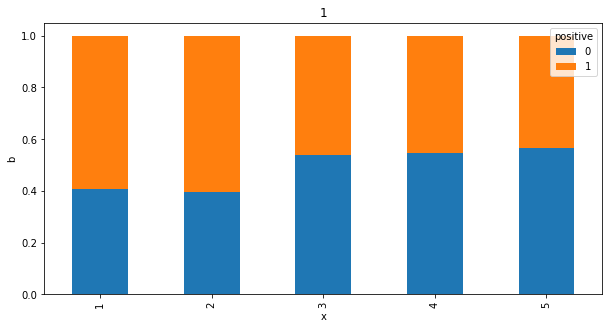

In [18]:
xt_pct.plot(figsize = (10, 5), kind = 'bar', stacked = True, title = "1")
plt.xlabel("x")
plt.ylabel("b")
plt.show()